In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/lindaungerbock/stats_combined.csv'  
data = pd.read_csv(file_path)




In [21]:
print(data.head())
print(data.info())
print(data.describe())


                   team   W   L   pf  oyds  o_plays  o_yds_play  turnovers  \
0         Buffalo Bills  11   6  451  6366     1115         5.7         28   
1        Miami Dolphins  11   6  496  6822     1053         6.5         25   
2         New York Jets   7  10  268  4566     1053         4.3         33   
3  New England Patriots   4  13  236  4696     1020         4.6         29   
4      Baltimore Ravens  13   4  483  6296     1076         5.9         19   

   o_fd  o_score_pct  ...  d_plays  d_yds_play  takeaways  d_fd  d_score_pct  \
0   381         41.4  ...     1015         5.1         30   313         32.0   
1   360         43.5  ...     1057         5.1         27   321         32.1   
2   260         26.0  ...     1087         4.6         27   298         31.8   
3   261         20.2  ...     1091         4.7         18   305         31.5   
4   360         43.1  ...     1109         4.6         31   306         28.7   

   line  year        ppg        pag  turnover_diff

In [25]:

print(data.columns)


Index(['team', 'W', 'L', 'pf', 'oyds', 'o_plays', 'o_yds_play', 'turnovers',
       'o_fd', 'o_score_pct', 'pa', 'dyds', 'd_plays', 'd_yds_play',
       'takeaways', 'd_fd', 'd_score_pct', 'line', 'year', 'ppg', 'pag',
       'turnover_diff'],
      dtype='object')


In [26]:

team_data = data.groupby('team').agg({
    'ppg': 'mean',  
    'pag': 'mean',  
    'turnovers': 'mean',  
}).reset_index()

print(team_data.head())

                team        ppg        pag  turnovers
0  Arizona Cardinals  21.941176  24.901961  19.333333
1    Atlanta Falcons  19.588235  23.882353  25.000000
2   Baltimore Ravens  23.921569  19.352941  22.000000
3      Buffalo Bills  27.235294  17.372549  25.666667
4  Carolina Panthers  17.392157  23.411765  23.333333


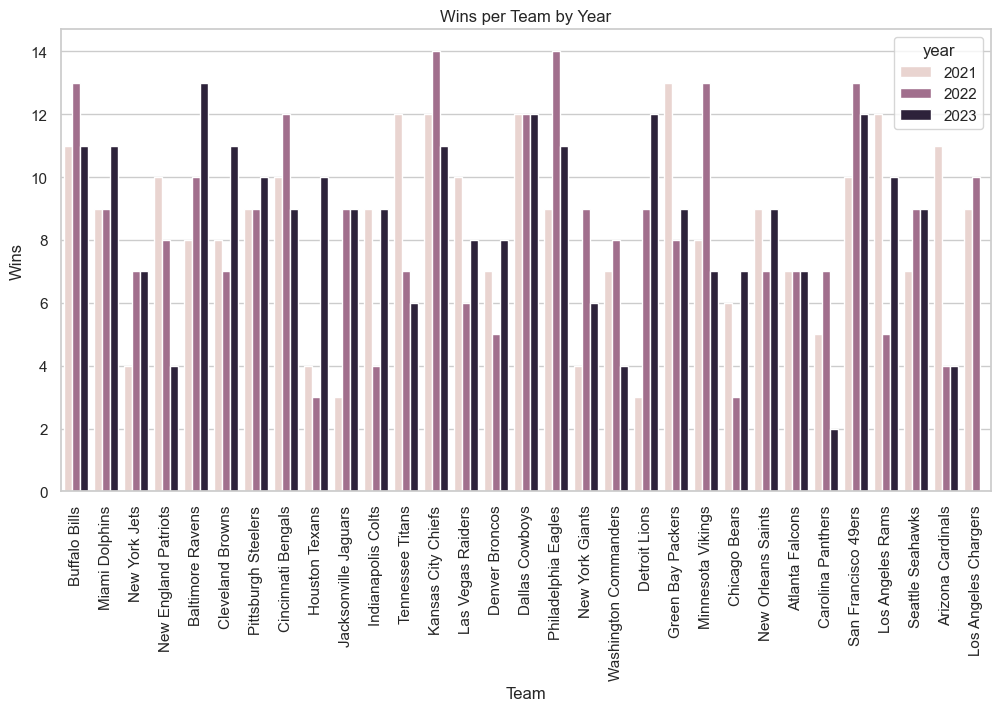

In [28]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='team', y='W', hue='year', errorbar=None)
plt.title('Wins per Team by Year')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()



Bar plot of the wins (W) for each team across the years to visualize how teams performed in different years

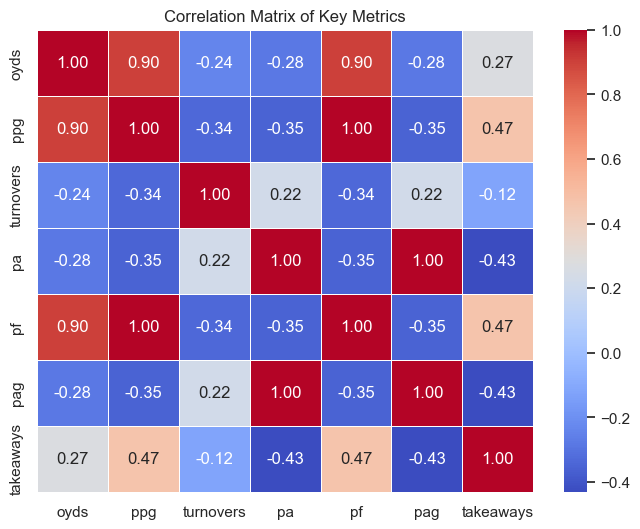

In [29]:

correlation_matrix = data[['oyds', 'ppg', 'turnovers', 'pa', 'pf', 'pag', 'takeaways']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Metrics')
plt.show()


Correlation between various statistics, such as yards (oyds), points per game (ppg), and turnovers

Scatter Plot: Yards vs Points Scored

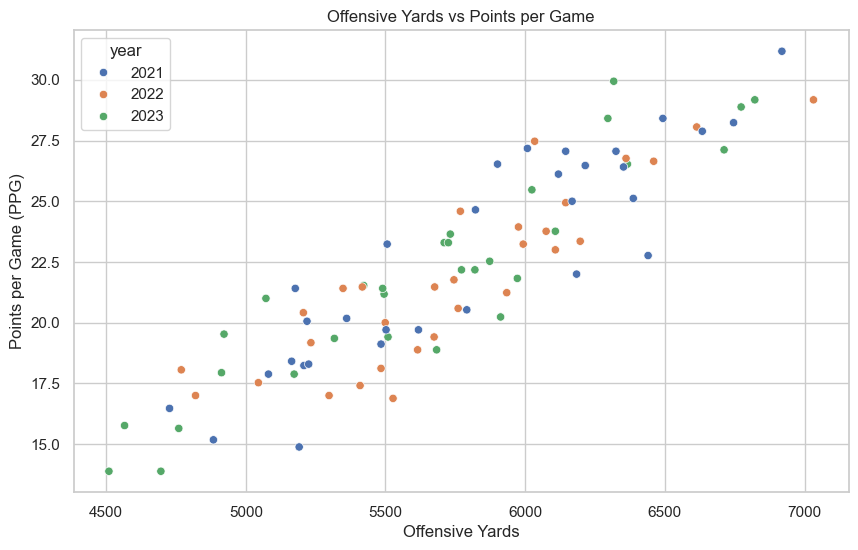

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='oyds', y='ppg', hue='year', palette='deep')
plt.title('Offensive Yards vs Points per Game')
plt.xlabel('Offensive Yards')
plt.ylabel('Points per Game (PPG)')
plt.show()


relationship between total offensive yards (oyds) and points per game (ppg)

Scatter Plot: Yards vs Points Scored

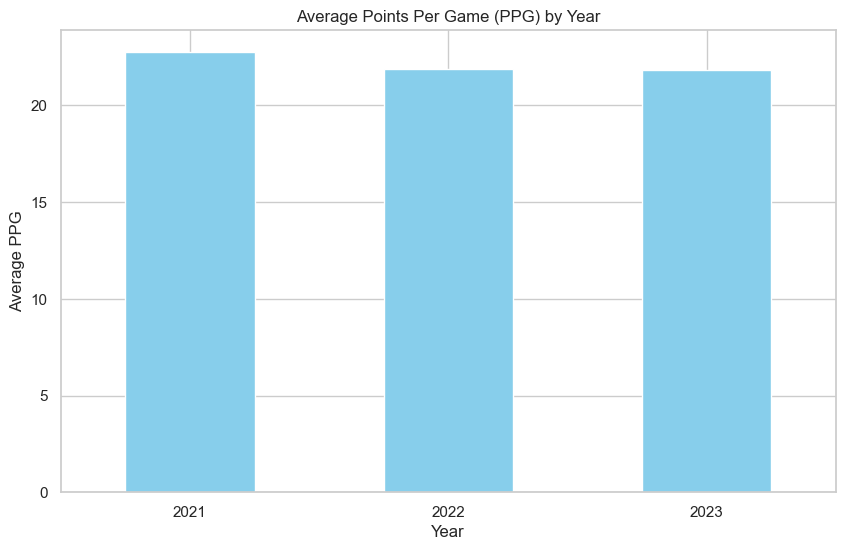

In [32]:

avg_ppg_by_year = data.groupby('year')['ppg'].mean()

plt.figure(figsize=(10, 6))
avg_ppg_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Points Per Game (PPG) by Year')
plt.xlabel('Year')
plt.ylabel('Average PPG')
plt.xticks(rotation=0)
plt.show()


In [ ]:
the average points scored per year 

Turnover Differential vs Wins

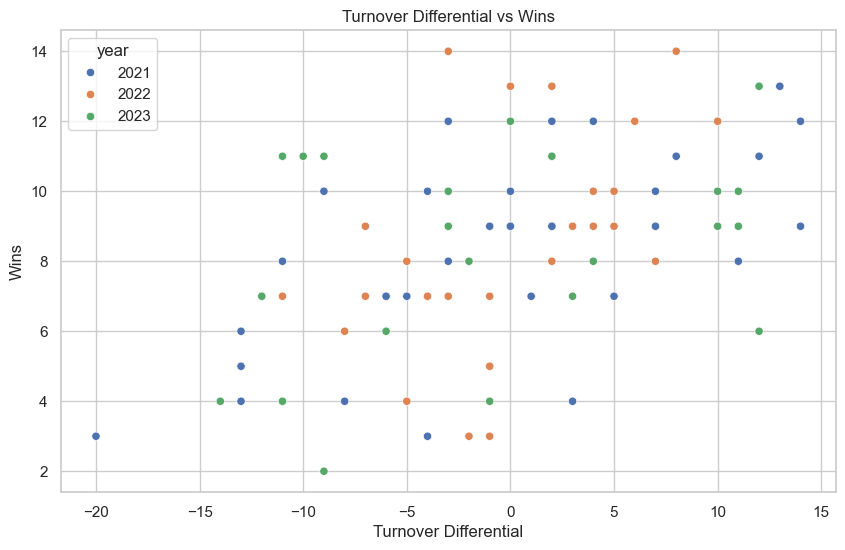

In [33]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='turnover_diff', y='W', hue='year', palette='deep')
plt.title('Turnover Differential vs Wins')
plt.xlabel('Turnover Differential')
plt.ylabel('Wins')
plt.show()


 relationship between turnover differential (turnover_diff) and wins (W)